In [1]:
#EDA-highlanes

In [1]:
'''!pip install pandas  seaborn  matplotlib statsmodels numpy openpyxl scikit-learn'''

'!pip install pandas  seaborn  matplotlib statsmodels numpy openpyxl scikit-learn'

In [2]:
import pandas as pd
import os

import warnings

import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose


# To ignore all warnings
warnings.filterwarnings("ignore")

# Or to ignore specific warnings by category
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
#df=pd.read_excel(r"t1_germany_files/shipment_complete_data_active_lane.xlsx")
df=pd.read_excel('/content/shipment_complete_data_active_lane.xlsx')
# os.listdir()

In [4]:
high_lanes = ['DE02_29142970', 'DE02_29145063', 'DE08_29144124', 'DE05_29724961', 'DE08_29222753', 'DE08_29242683', 'DE05_29146035', 'DE08_29292703', 'DE05_29546496', 'DE02_29626095', 'DE08_29142964', 'DE08_29144781', 'DE08_29143647', 'DE08_29143519']
high_lanes

['DE02_29142970',
 'DE02_29145063',
 'DE08_29144124',
 'DE05_29724961',
 'DE08_29222753',
 'DE08_29242683',
 'DE05_29146035',
 'DE08_29292703',
 'DE05_29546496',
 'DE02_29626095',
 'DE08_29142964',
 'DE08_29144781',
 'DE08_29143647',
 'DE08_29143519']

In [60]:
df['Lane']=df['Lane'].astype('str')
old_lanes =df.groupby('Lane')['shipment'].sum().sort_values().tail(7).index.tolist()

In [61]:
df_h = df[df['Lane'].isin(high_lanes)]
print(len(df_h))

2912


In [8]:
items_not_in_list2 = [item for item in high_lanes if item not in old_lanes]
items_not_in_list2

['DE08_29242683',
 'DE08_29292703',
 'DE02_29626095',
 'DE08_29142964',
 'DE08_29144781',
 'DE08_29143647',
 'DE08_29143519']

In [62]:
#df2 = df_h[df_h['Lane'].isin(items_not_in_list2)][['date','shipment','Lane']]  #timeseries data

df2=df_h[['date','shipment','Lane']]

# Convert the datetime column to datetime format (if necessary)
df2['date'] = pd.to_datetime(df2['date'])

# Set the datetime column as the index
df2 = df2.set_index('date')

print(df2.sort_values(by='Lane'))

            shipment           Lane
date                               
2020-01-06        11  DE02_29142970
2022-07-18        22  DE02_29142970
2022-07-25        15  DE02_29142970
2022-08-01        18  DE02_29142970
2022-08-08        12  DE02_29142970
...              ...            ...
2021-05-24         7  DE08_29292703
2021-05-31         0  DE08_29292703
2021-06-07        10  DE08_29292703
2021-12-20        11  DE08_29292703
2023-12-25         8  DE08_29292703

[2912 rows x 2 columns]


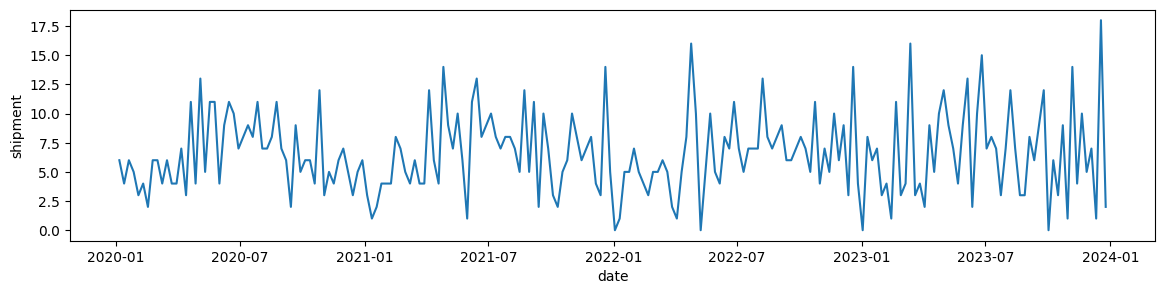

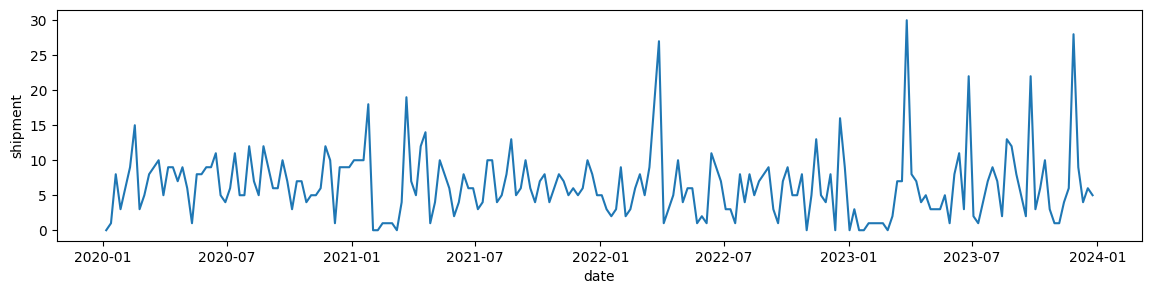

In [10]:
# prompt: create a lineplot with hue=Column2, index=column1 and plit of column3 pandas


for lane in df2['Lane'].unique()[:2]:
  plt.figure(figsize=(14,3))
  data=df2[df2['Lane']==lane]
  sns.lineplot(
      x=data.index,
      y=data['shipment']
  )
  plt.show()



In [11]:
#breaker # used to stop running of code

In [12]:

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

for lane in df2['Lane'].unique()[:2]:

  print(f"lane is {lane}")
  # plt.figure(figsize=(14,3))
  data1=df2[df2['Lane']==lane]


  # Dickey-Fuller Test (ADF)
  print("----- Dickey-Fuller Test (ADF) -----")
  adf_result = adfuller(data1['shipment'])  # Apply ADF test to the 'value' series in df2

  # Print test statistics
  print(f"ADF Statistic: {adf_result[0]}")
  print(f"p-value: {adf_result[1]}")


  critical_values = {'1%': -3.47, '5%': -2.88, '10%': -2.57}  # Example critical values
  print(critical_values)
  if adf_result[0] < critical_values['5%'] and adf_result[1] < 0.05:
      print("Strong evidence for stationarity (Statistic יותר שלילי מ- Critical Value ופ-ערך נמוך)")
  elif adf_result[0] >= critical_values['10%'] and adf_result[1] >= 0.1:
      print("Weak evidence for stationarity (Statistic פחות שלילי מ- Critical Value ופ-ערך גבוה)")
  else:
      print("Inconclusive results or evidence for non-stationarity")



  ## ADF test for differenced series
  print("----- Dickey-Fuller Test (ADF) for differenced series -----")
  adf_result = adfuller(data1['shipment'].diff().dropna())  # Apply ADF test to the 'value' series in df2

  # Print test statistics
  print(f"ADF Statistic: {adf_result[0]}")
  print(f"p-value: {adf_result[1]}")




lane is DE02_29626095
----- Dickey-Fuller Test (ADF) -----
ADF Statistic: -4.115588450422853
p-value: 0.0009126308934284736
{'1%': -3.47, '5%': -2.88, '10%': -2.57}
Strong evidence for stationarity (Statistic יותר שלילי מ- Critical Value ופ-ערך נמוך)
----- Dickey-Fuller Test (ADF) for differenced series -----
ADF Statistic: -8.902987947602735
p-value: 1.1578238758566269e-14
lane is DE08_29142964
----- Dickey-Fuller Test (ADF) -----
ADF Statistic: -12.584632890982547
p-value: 1.8776379047677e-23
{'1%': -3.47, '5%': -2.88, '10%': -2.57}
Strong evidence for stationarity (Statistic יותר שלילי מ- Critical Value ופ-ערך נמוך)
----- Dickey-Fuller Test (ADF) for differenced series -----
ADF Statistic: -8.905619935182973
p-value: 1.1399986806444006e-14


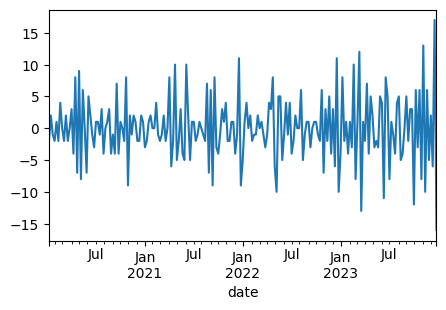

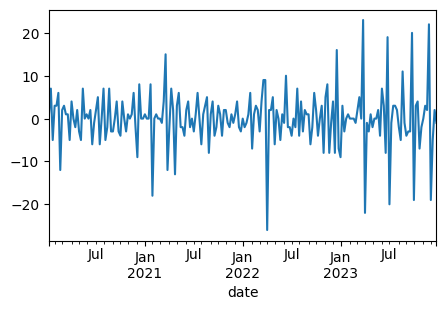

In [13]:


# Optional: Visualize differenced series to see if stationarity is achieved after differencing
for lane in df2.Lane.unique()[:2]:

  data=df2[df2['Lane']==lane][['shipment']]

  data=data['shipment'].diff().dropna()

  plt.figure(figsize=(5,3))
  data.plot(kind='line')
  plt.show()


In [14]:
##### DECOMPOSITION #####
#########################


##### USING multiple periods

===========================LANE IS DE02_29142970===========================================
PERIOD IS 52------------------------------
SUM VALUE OF RESIDUAL ARE [-7.16]


<Figure size 1300x300 with 0 Axes>

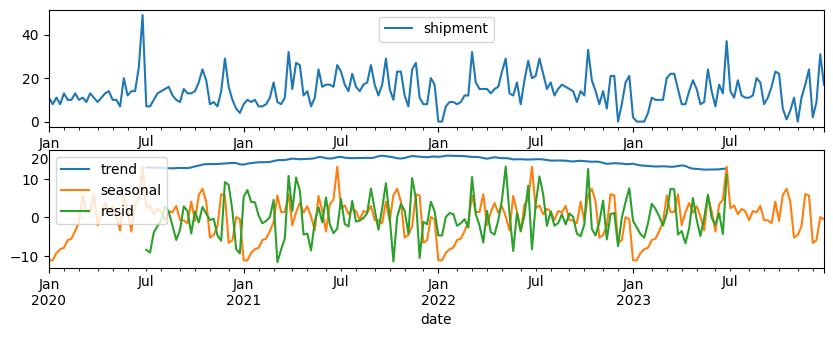

===========================LANE IS DE02_29145063===========================================
PERIOD IS 52------------------------------
SUM VALUE OF RESIDUAL ARE [-28.15]


<Figure size 1300x300 with 0 Axes>

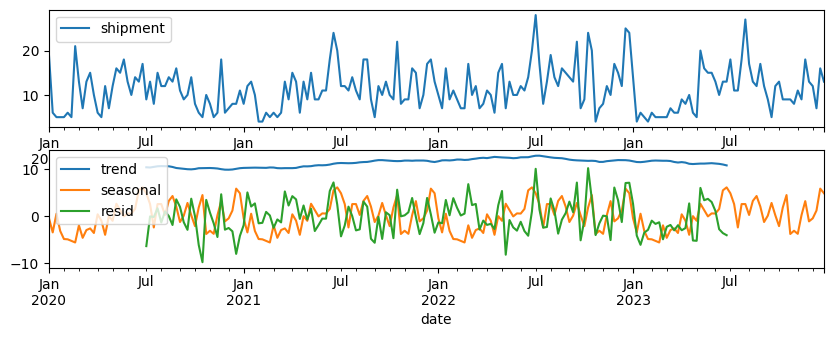

===========================LANE IS DE02_29626095===========================================
PERIOD IS 52------------------------------
SUM VALUE OF RESIDUAL ARE [7.49]


<Figure size 1300x300 with 0 Axes>

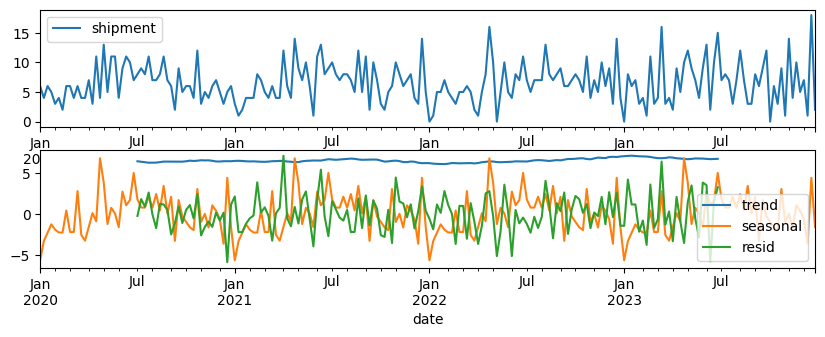

===========================LANE IS DE05_29146035===========================================
PERIOD IS 52------------------------------
SUM VALUE OF RESIDUAL ARE [10.06]


<Figure size 1300x300 with 0 Axes>

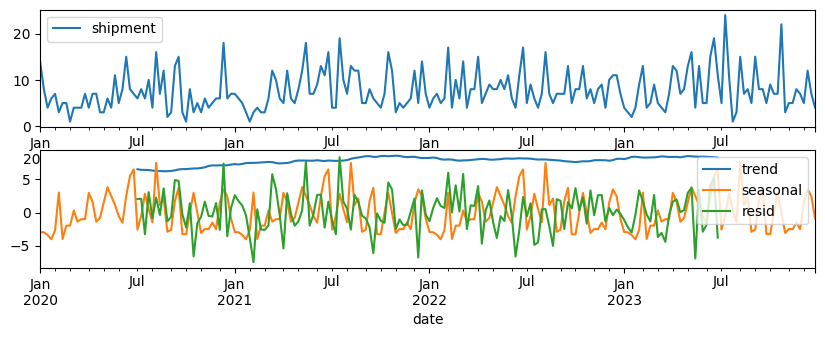

===========================LANE IS DE05_29546496===========================================
PERIOD IS 52------------------------------
SUM VALUE OF RESIDUAL ARE [12.25]


<Figure size 1300x300 with 0 Axes>

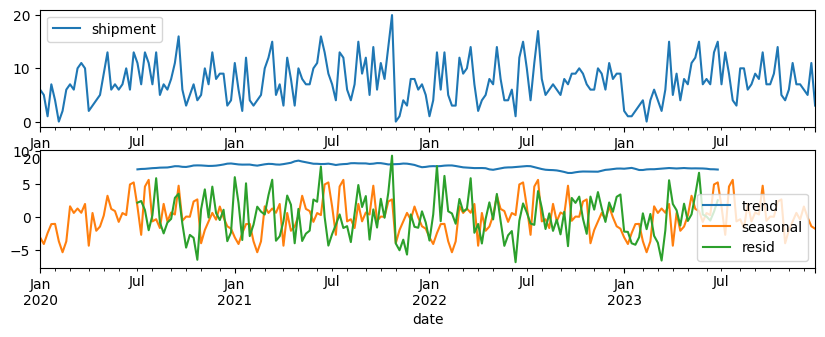

===========================LANE IS DE05_29724961===========================================
PERIOD IS 52------------------------------
SUM VALUE OF RESIDUAL ARE [32.12]


<Figure size 1300x300 with 0 Axes>

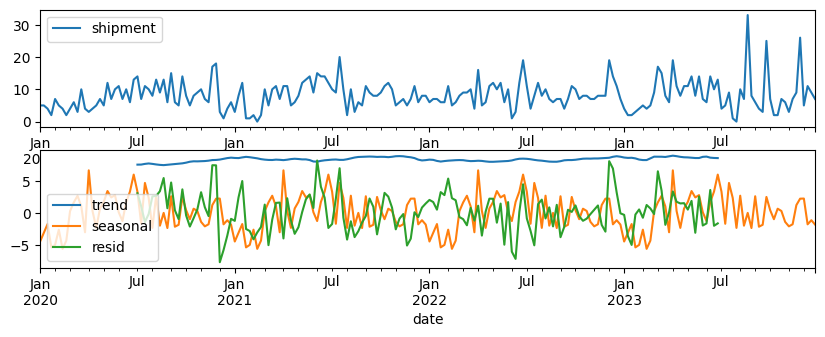

In [63]:
'''PLOTTING TRENDS FOR DIFFERENT TIME PERIODS'''


from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

for lane in df2['Lane'].unique()[:6]:
  i=0
  residual_sum=[]

  print(F"===========================LANE IS {lane}===========================================")

  for period in [52]:
    print(F"PERIOD IS {period}------------------------------")
    i+=1



    plt.figure(figsize=(13,3))

    data=df2[df2['Lane']==lane][['shipment']]

    result = seasonal_decompose(data['shipment'], model='additive', period=period)

    # Access the decomposed components
    trend = result.trend
    seasonal = result.seasonal
    residual = result.resid


    # Visualization
    plt.figure(figsize=(10, 7))

    plt.subplot(411)
    data['shipment'].plot(kind='line')
    plt.legend()

    plt.subplot(412)
    trend.plot(kind='line')
    seasonal.plot(kind='line')
    residual.plot(kind='line')
    residual_sum.append(round(residual.sum(),2))
    print(f"SUM VALUE OF RESIDUAL ARE {residual_sum}")
    plt.legend()
    plt.show()


In [16]:
'''OBSERVATIONS

1. trend is very smooth for 8,12,13 periods
2. seasonality grows in amplitude peaks for PERIOD=13
3. errors are 0 or white noise for __ periods'''

'OBSERVATIONS\n\n1. trend is very smooth for 8,12,13 periods\n2. seasonality grows in amplitude peaks for PERIOD=13\n3. errors are 0 or white noise for __ periods'

===========================LANE IS DE02_29626095===========================================
===========================LANE IS DE08_29142964===========================================


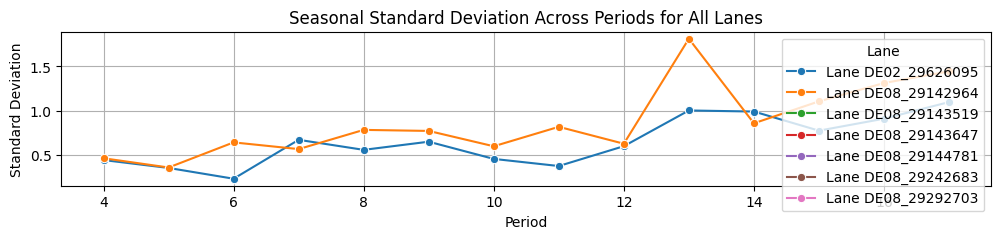

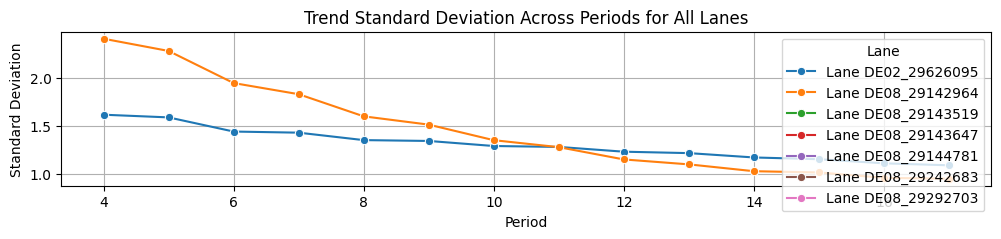

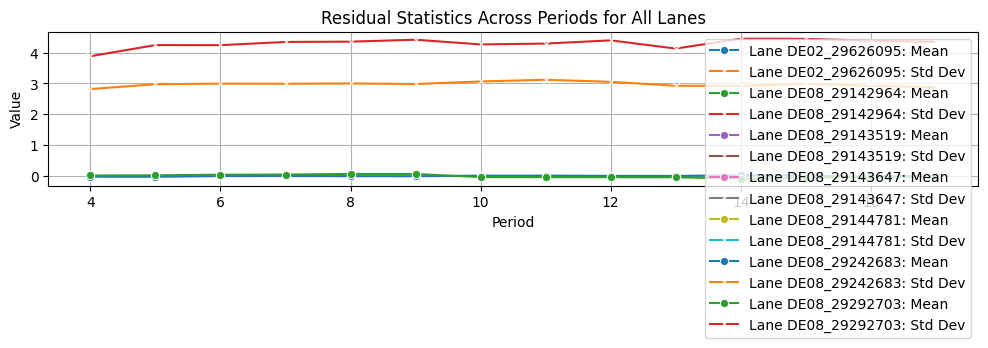

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Initialize empty DataFrames to store data for all components
all_trend_std_dev = pd.DataFrame(columns=['Lane', 'Period', 'Trend_Std_Dev'])
all_seasonal_std_dev = pd.DataFrame(columns=['Lane', 'Period', 'Seasonal_Std_Dev'])
all_residual_stats = pd.DataFrame(columns=['Lane', 'Period', 'Residual_Mean', 'Residual_Std_Dev'])

# Iterate over each lane
for lane in df2['Lane'].unique()[:2]:
    print(f"===========================LANE IS {lane}===========================================")

    # Initialize lists to store results across periods
    trend_std_dev = []
    seasonal_std_dev = []
    residual_mean = []
    residual_std_dev = []

    # Iterate over each period from 4 to 17 (inclusive)
    for period in range(4, 18):
        # Decompose the time series
        data = df2[df2['Lane'] == lane]['shipment']
        result = seasonal_decompose(data, model='additive', period=period)

        # Compute standard deviation of trend
        trend_std_dev.append(np.std(result.trend.dropna()))

        # Compute standard deviation of seasonal component
        seasonal_std_dev.append(np.std(result.seasonal.dropna()))

        # Compute mean and standard deviation of residual component
        residual_mean.append(np.mean(result.resid.dropna()))
        residual_std_dev.append(np.std(result.resid.dropna()))

    # Store trend standard deviation data for the current lane
    lane_trend_std_dev = pd.DataFrame({'Lane': [lane] * len(range(4, 18)),
                                       'Period': list(range(4, 18)),
                                       'Trend_Std_Dev': trend_std_dev})
    all_trend_std_dev = pd.concat([all_trend_std_dev, lane_trend_std_dev])

    # Store seasonal standard deviation data for the current lane
    lane_seasonal_std_dev = pd.DataFrame({'Lane': [lane] * len(range(4, 18)),
                                          'Period': list(range(4, 18)),
                                          'Seasonal_Std_Dev': seasonal_std_dev})
    all_seasonal_std_dev = pd.concat([all_seasonal_std_dev, lane_seasonal_std_dev])

    # Store residual mean and standard deviation data for the current lane
    lane_residual_stats = pd.DataFrame({'Lane': [lane] * len(range(4, 18)),
                                        'Period': list(range(4, 18)),
                                        'Residual_Mean': residual_mean,
                                        'Residual_Std_Dev': residual_std_dev})
    all_residual_stats = pd.concat([all_residual_stats, lane_residual_stats])

# Plot seasonal standard deviation across periods for all lanes
plt.figure(figsize=(12, 2))
for lane in df2['Lane'].unique():
    sns.lineplot(data=all_seasonal_std_dev[all_seasonal_std_dev['Lane'] == lane], x='Period', y='Seasonal_Std_Dev', marker='o', label=f'Lane {lane}')
plt.title('Seasonal Standard Deviation Across Periods for All Lanes')
plt.xlabel('Period')
plt.ylabel('Standard Deviation')
plt.grid(True)
plt.legend(title='Lane')
plt.show()

# Plot trend standard deviation across periods for all lanes
plt.figure(figsize=(12, 2))
for lane in df2['Lane'].unique():
    sns.lineplot(data=all_trend_std_dev[all_trend_std_dev['Lane'] == lane], x='Period', y='Trend_Std_Dev', marker='o', label=f'Lane {lane}')
plt.title('Trend Standard Deviation Across Periods for All Lanes')
plt.xlabel('Period')
plt.ylabel('Standard Deviation')
plt.grid(True)
plt.legend(title='Lane')
plt.show()

# Plot residual mean and standard deviation across periods for all lanes
plt.figure(figsize=(12, 2))
for lane in df2['Lane'].unique():
    sns.lineplot(data=all_residual_stats[all_residual_stats['Lane'] == lane], x='Period', y='Residual_Mean', marker='o', label=f'Lane {lane}: Mean')
    sns.lineplot(data=all_residual_stats[all_residual_stats['Lane'] == lane], x='Period', y='Residual_Std_Dev', marker='x', label=f'Lane {lane}: Std Dev')
plt.title('Residual Statistics Across Periods for All Lanes')
plt.xlabel('Period')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()


In [18]:
# break the code
# error

In [19]:
'''----------> NO trend
----------> YES seasonality
----------> YES random residuals'''

'----------> NO trend\n----------> YES seasonality\n----------> YES random residuals'

In [20]:
'''STEPS
1.check outliers
2.decompose and fix trends,seasonality etc. # just for obeservability
3.check stationarity (seasonal component can remain because we checked only for weak stationarity)
4. check if seasonal component is there?
4. Find seasonal component (using ACF, pacf, or decomposition)
4.1 either fix it using seasonal decompositoin // or use seasonal ARIMA'''

'STEPS\n1.check outliers\n2.decompose and fix trends,seasonality etc. # just for obeservability\n3.check stationarity (seasonal component can remain because we checked only for weak stationarity)\n4. check if seasonal component is there?\n4. Find seasonal component (using ACF, pacf, or decomposition)\n4.1 either fix it using seasonal decompositoin // or use seasonal ARIMA'

In [21]:
###########################################################################################
################################################################## CASE in focus #####
###########################################################################################

In [22]:
df2

,shipment,Lane
date,,
2020-01-06,6,DE02_29626095
2020-01-13,4,DE02_29626095
2020-01-20,6,DE02_29626095
2020-01-27,5,DE02_29626095
2020-02-03,3,DE02_29626095
...,...,...
2023-11-27,20,DE08_29292703
2023-12-04,0,DE08_29292703
2023-12-11,2,DE08_29292703


In [203]:
def remove_noise_and_get_smooth(data):

  print(f"THE NOISE AND TREND WILL BE REMOVED HERE")


  res = seasonal_decompose(data, model='additive', period=52)
  trend= res.trend
  resid = res.resid
  seasonal = res.seasonal

  #print(trend.isna().sum() , resid.isna().sum(),seasonal.isna().sum())

  error_std = resid.dropna().describe()['std']
  print("error is -- ",round(error_std,0))


  #### TREND
  #### 1take trend as mean of trend
  #### 2take trend as last trend value

  trend_mean = trend.dropna().describe()['mean']
  print('trend is -- ',round(trend_mean,0))

  trend_last = trend[-1]
  print(trend_last)

  #plt.plot(seasonal)

  return pd.DataFrame(seasonal) , round(error_std,2), round(trend_mean,2)

##########################

dx=df2[df2['Lane']=='DE08_29143519']['shipment']
a,b,c=remove_noise_and_get_smooth(dx)





THE NOISE AND TREND WILL BE REMOVED HERE
error is --  5.0
trend is --  6.0


In [204]:
c

date
2020-07-06    5.48
2020-07-13    5.47
2020-07-20    5.51
2020-07-27    5.54
2020-08-03    5.50
              ... 
2023-05-29    4.88
2023-06-05    4.74
2023-06-12    4.68
2023-06-19    4.71
2023-06-26    4.67
Name: trend, Length: 156, dtype: float64

In [24]:
import time

In [179]:
result_df = pd.DataFrame()

for lane in high_lanes:

    print(f"lane is {lane}")

    dl = df2[df2['Lane'] == lane]

    train = dl[:182]
    test= dl[182:208] #   VALIDATION SET IS ONLY 6 MONTHS


    print('ogggg',train.head(3))

    a, b, c = remove_noise_and_get_smooth(train['shipment']) # this will only work for 3.5 yrs

    ### VALIDATION ON LAST YEAR 2023
    #print(f"a is {a[-52:]}")

    print(test.head(3))

    test['seasonal'] = a[-26:]['seasonal'].tolist()
    test['err'] = b
    test['trend'] = c

    print(test.head(2))

    # Append the modified subset to the result DataFrame
    result_df = result_df.append(test)

# Print the result DataFrame
print(result_df.head())




lane is DE02_29142970
ogggg             shipment           Lane
date                               
2020-01-06        11  DE02_29142970
2020-01-13         8  DE02_29142970
2020-01-20        11  DE02_29142970
THE NOISE AND TREND WILL BE REMOVED HERE
error is --  5.0
trend is --  14.9
            shipment           Lane
date                               
2023-07-03        14  DE02_29142970
2023-07-10        11  DE02_29142970
2023-07-17        19  DE02_29142970
            shipment           Lane  seasonal   err  trend
date                                                      
2023-07-03        14  DE02_29142970  0.812962  4.66   14.9
2023-07-10        11  DE02_29142970 -2.095692  4.66   14.9
lane is DE02_29145063
ogggg             shipment           Lane
date                               
2020-01-06        19  DE02_29145063
2020-01-13         6  DE02_29145063
2020-01-20         5  DE02_29145063
THE NOISE AND TREND WILL BE REMOVED HERE
error is --  3.0
trend is --  11.24
            shi

In [180]:
result_df.shape

(364, 5)

In [181]:
result_df['seasonal_plus_trend'] = result_df['seasonal']+result_df['trend']
result_df

,shipment,Lane,seasonal,err,trend,seasonal_plus_trend
date,,,,,,
2023-07-03,14,DE02_29142970,0.812962,4.66,14.90,15.712962
2023-07-10,11,DE02_29142970,-2.095692,4.66,14.90,12.804308
2023-07-17,19,DE02_29142970,-2.037999,4.66,14.90,12.862001
2023-07-24,12,DE02_29142970,3.476424,4.66,14.90,18.376424
2023-07-31,11,DE02_29142970,0.990847,4.66,14.90,15.890847
...,...,...,...,...,...,...
2023-11-27,1,DE08_29143519,-3.899131,4.22,5.02,1.120869
2023-12-04,7,DE08_29143519,-3.870285,4.22,5.02,1.149715
2023-12-11,11,DE08_29143519,0.610484,4.22,5.02,5.630484


In [182]:
### error calculation -OVERALL

result_df['abs_error'] = np.abs(result_df['shipment'] - result_df['seasonal_plus_trend'])
print(result_df.head(3))
print("\n")
print(f"Error at overall level = {100*result_df['abs_error'].sum()/result_df['shipment'].sum()}%")

            shipment           Lane  seasonal   err  trend  \
date                                                         
2023-07-03        14  DE02_29142970  0.812962  4.66   14.9   
2023-07-10        11  DE02_29142970 -2.095692  4.66   14.9   
2023-07-17        19  DE02_29142970 -2.037999  4.66   14.9   

            seasonal_plus_trend  abs_error  
date                                        
2023-07-03            15.712962   1.712962  
2023-07-10            12.804308   1.804308  
2023-07-17            12.862001   6.137999  


Error at overall level = 60.09127747079699%


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

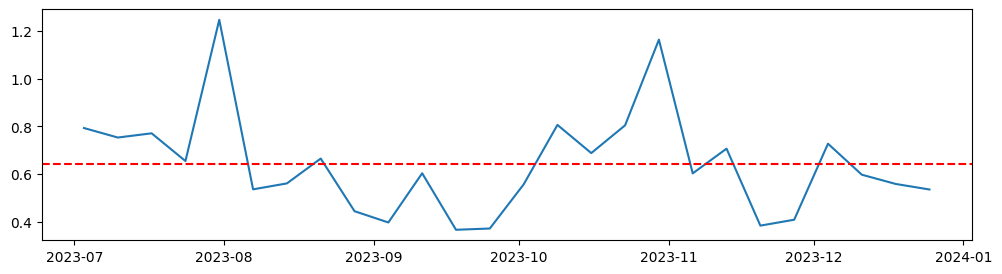

In [183]:
### error calc - Lanewise
import numpy as np


result_df['abs_error'] = np.abs(result_df['shipment'] - result_df['seasonal_plus_trend'])

# Group by 'lane' and compute sum of absolute errors and sum of shipments
grouped_df = result_df.reset_index().groupby('date').agg(
    total_abs_error=('abs_error', 'sum'),
    total_shipments=('shipment', 'sum')
)

# Compute the fraction of the sum of absolute errors to the sum of shipments for each lane
grouped_df['error_ratio'] = grouped_df['total_abs_error'] / grouped_df['total_shipments']

# Print or use grouped_df as needed
grouped_df

plt.figure(figsize=(12,3))
plt.plot(grouped_df['error_ratio'])
plt.axhline(y=grouped_df['error_ratio'].mean(), color='r', linestyle='--')
plt.plot



               total_abs_error  total_shipments  error_ratio
Lane                                                        
DE02_29142970       156.900814              342     0.458774
DE02_29145063        94.068476              329     0.285922
DE02_29626095        82.480155              172     0.479536
DE05_29146035        96.768010              216     0.448000
DE05_29546496        74.882293              201     0.372549
DE05_29724961       138.816923              216     0.642671
DE08_29142964       111.180429              180     0.617669
DE08_29143519       147.029453              131     1.122362
DE08_29143647       147.969985              204     0.725343
DE08_29144124       230.145976              340     0.676900
DE08_29144781       145.901775              207     0.704839
DE08_29222753       136.592507              163     0.837991
DE08_29242683       165.590636              150     1.103938
DE08_29292703       106.259268              202     0.526036


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

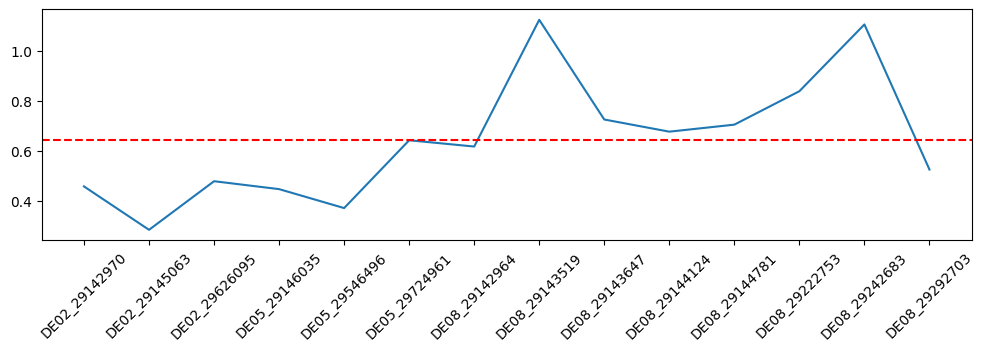

In [189]:
## ERRor calc - datewise


result_df['abs_error'] = np.abs(result_df['shipment'] - result_df['seasonal_plus_trend'])

# Group by 'lane' and compute sum of absolute errors and sum of shipments
grouped_df = result_df.groupby('Lane').agg(
    total_abs_error=('abs_error', 'sum'),
    total_shipments=('shipment', 'sum')
)

# Compute the fraction of the sum of absolute errors to the sum of shipments for each lane
grouped_df['error_ratio'] = grouped_df['total_abs_error'] / grouped_df['total_shipments']

# Print or use grouped_df as needed
print(grouped_df)

plt.figure(figsize=(12,3))
plt.plot(grouped_df['error_ratio'])
plt.axhline(y=grouped_df['error_ratio'].mean(), color='r', linestyle='--')
plt.xticks(rotation=45)
plt.plot


            total_abs_error  total_shipments  error_ratio
date                                                     
2023-07-03        74.547204               94     0.793055
2023-07-10        72.313099               96     0.753261
2023-07-17       119.498033              155     0.770955
2023-07-24        81.838321              125     0.654707
2023-07-31       122.225503               98     1.247199
2023-08-07        80.929357              151     0.535956
2023-08-14        58.328240              104     0.560848
2023-08-21        99.755651              150     0.665038
2023-08-28        60.856391              137     0.444207
2023-09-04        59.553654              150     0.397024
2023-09-11        52.498713               87     0.603433
2023-09-18        43.226250              118     0.366324
2023-09-25        81.390296              219     0.371645
2023-10-02        53.431531               96     0.556578
2023-10-09        48.371450               60     0.806191
2023-10-16    

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

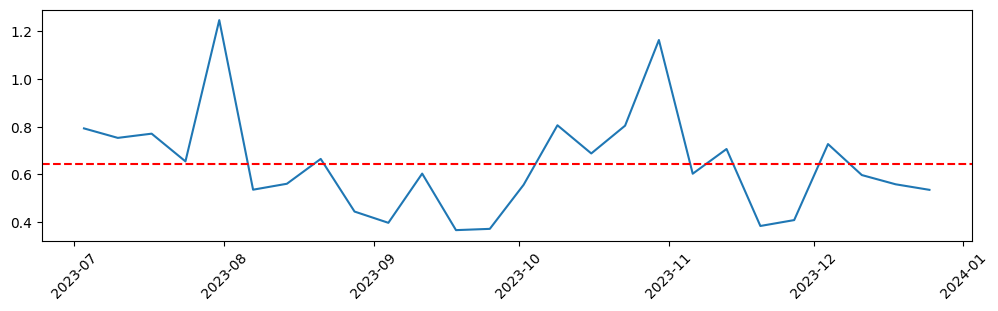

In [190]:
## ERRor calc - datewise


result_df['abs_error'] = np.abs(result_df['shipment'] - result_df['seasonal_plus_trend'])

# Group by 'lane' and compute sum of absolute errors and sum of shipments
grouped_df = result_df.groupby('date').agg(
    total_abs_error=('abs_error', 'sum'),
    total_shipments=('shipment', 'sum')
)

# Compute the fraction of the sum of absolute errors to the sum of shipments for each lane
grouped_df['error_ratio'] = grouped_df['total_abs_error'] / grouped_df['total_shipments']

# Print or use grouped_df as needed
print(grouped_df)

plt.figure(figsize=(12,3))
plt.plot(grouped_df['error_ratio'])
plt.axhline(y=grouped_df['error_ratio'].mean(), color='r', linestyle='--')
plt.xticks(rotation=45)
plt.plot

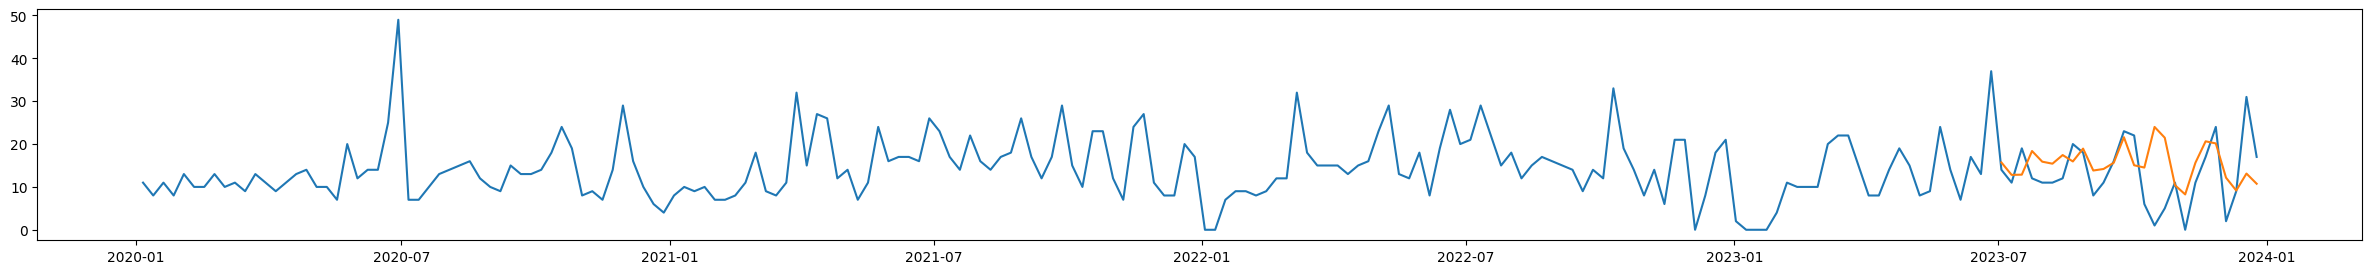

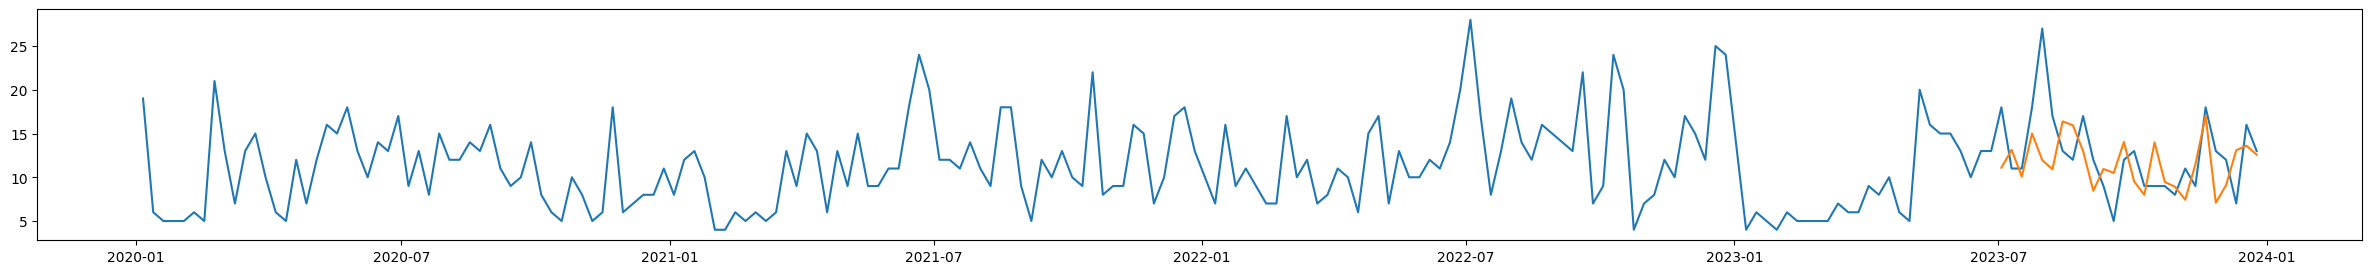

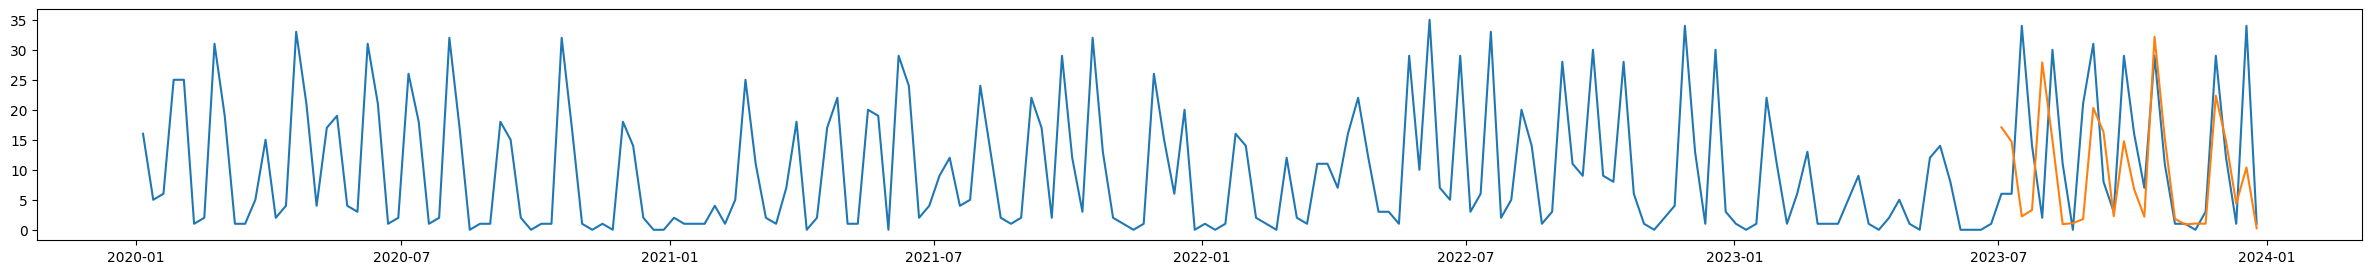

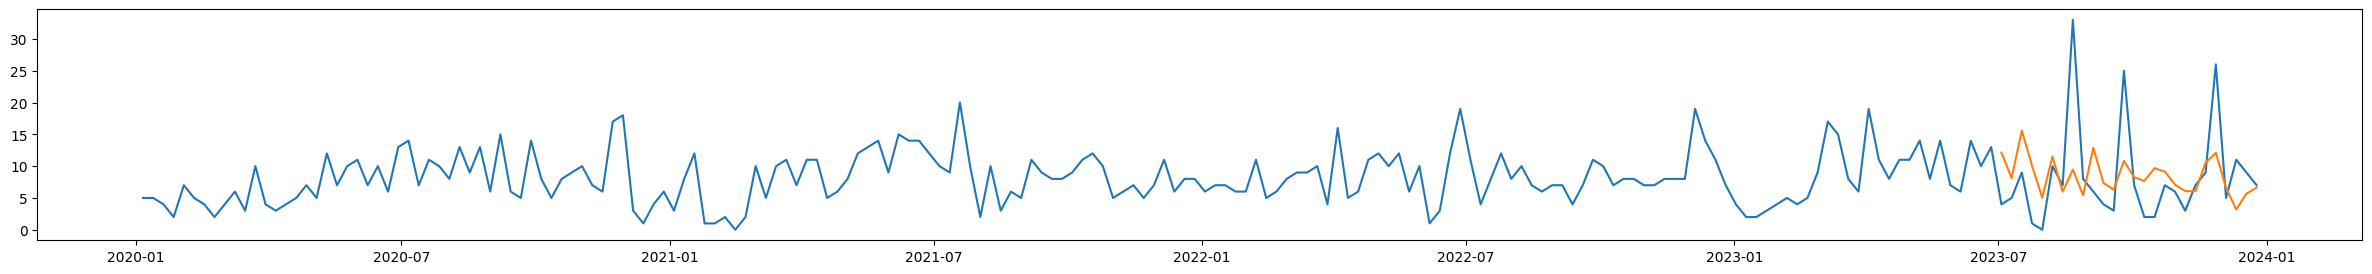

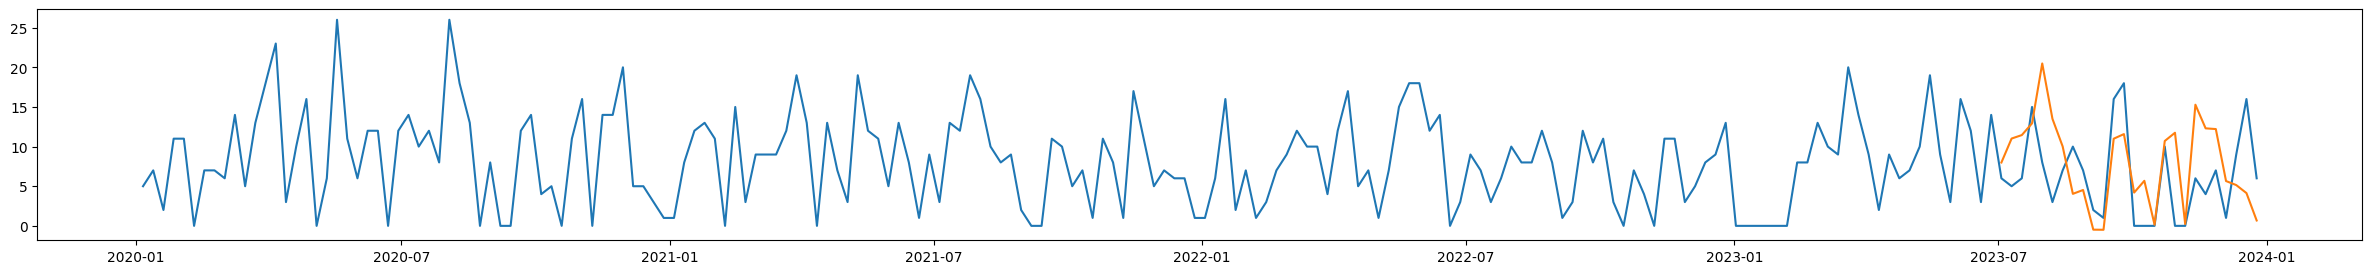

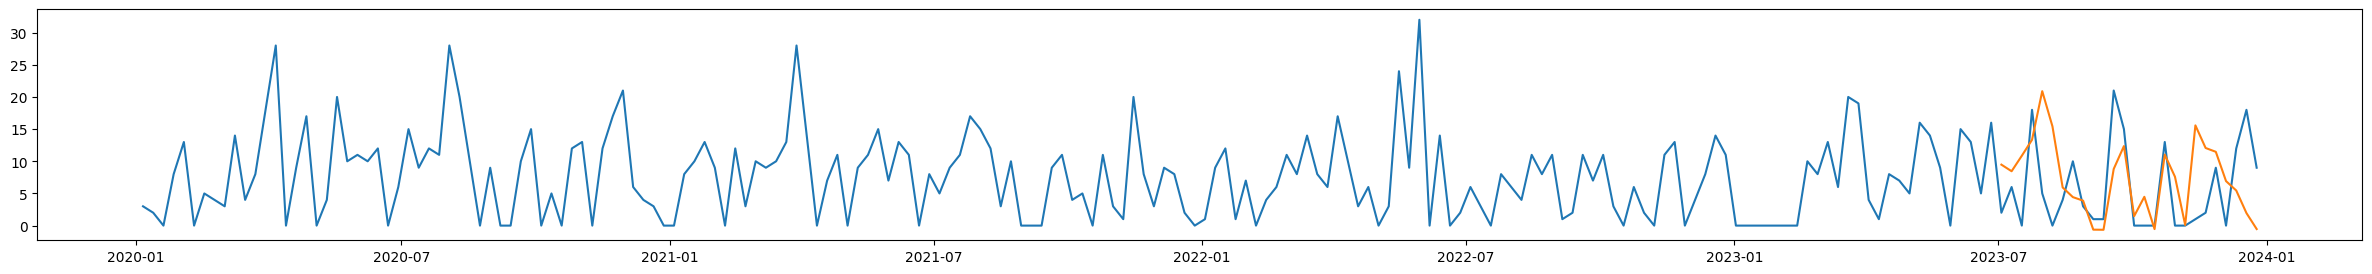

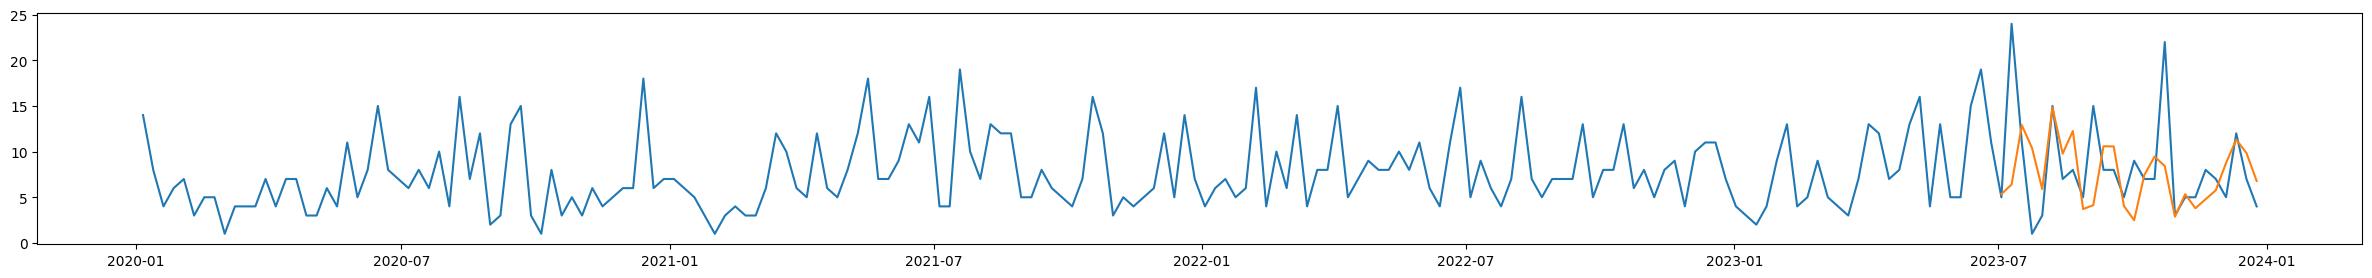

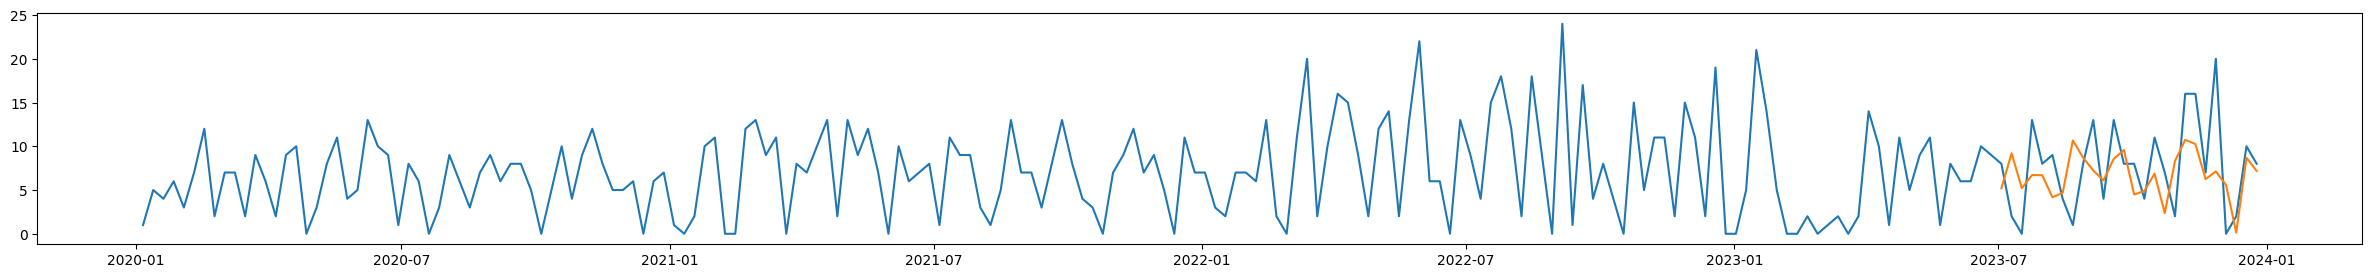

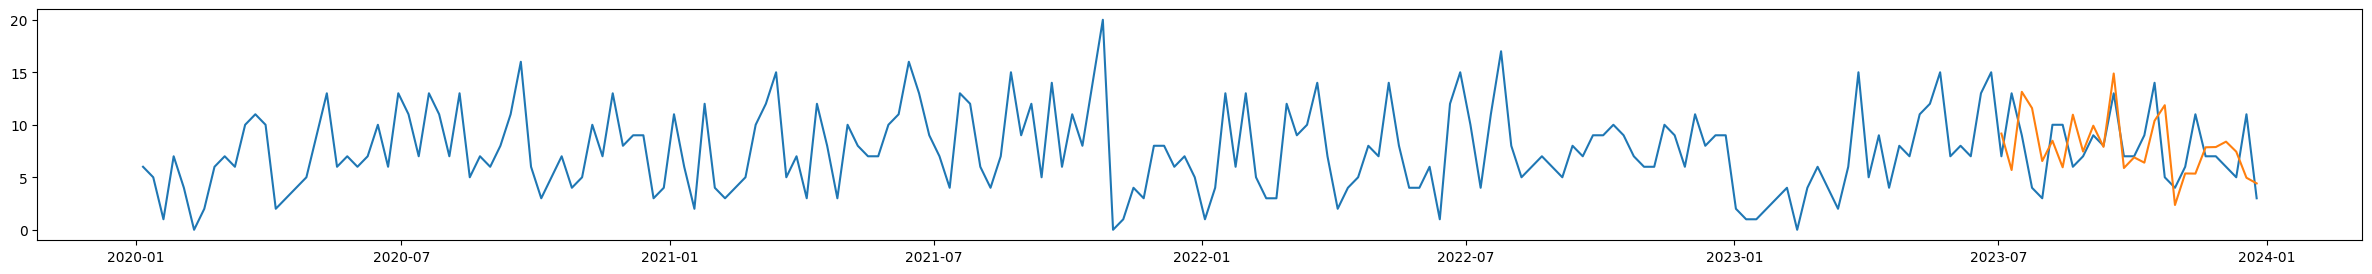

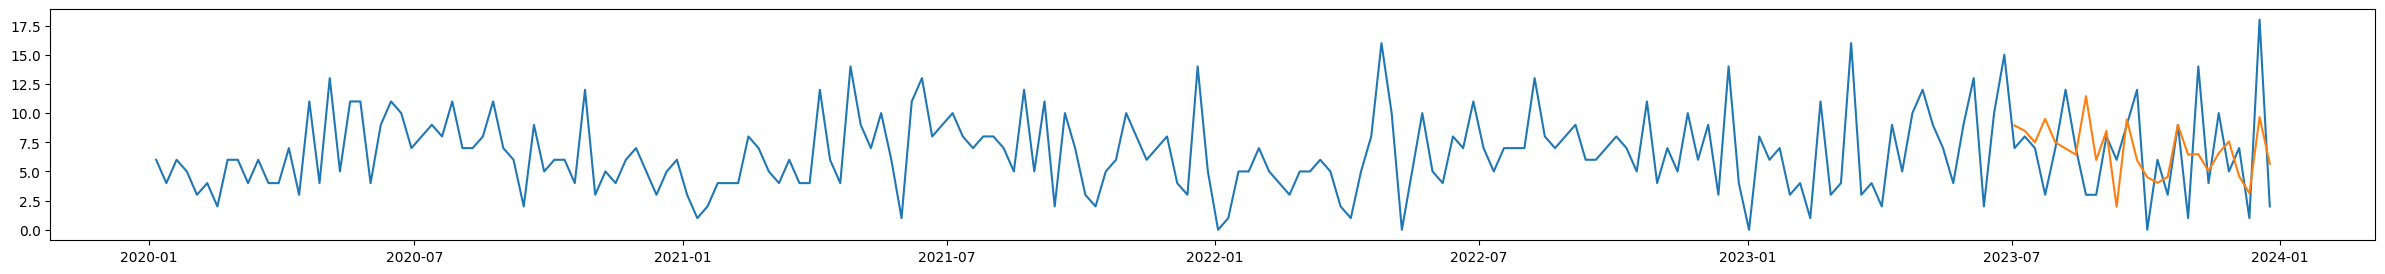

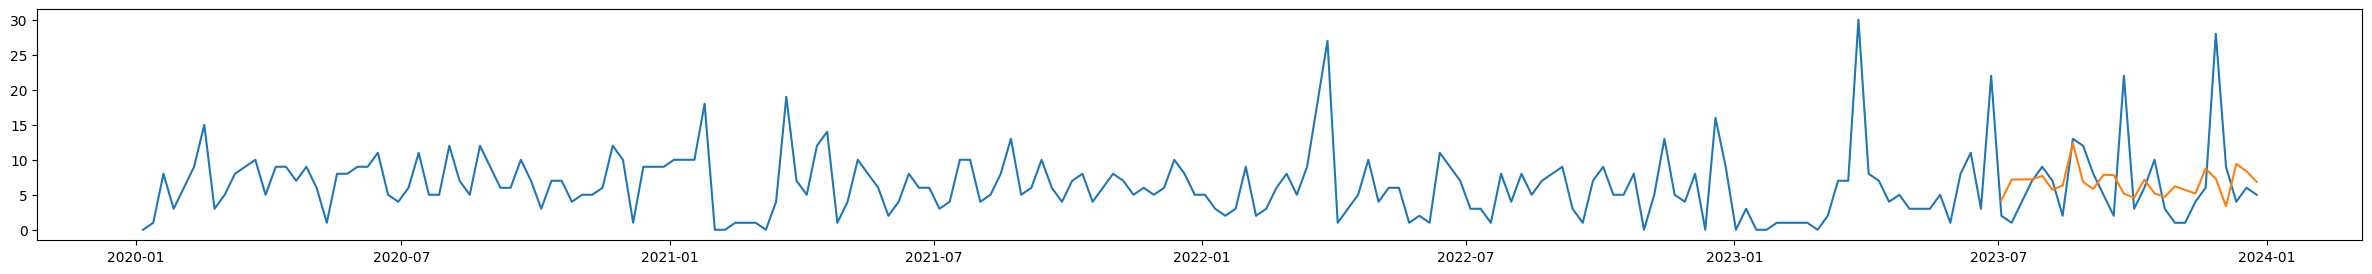

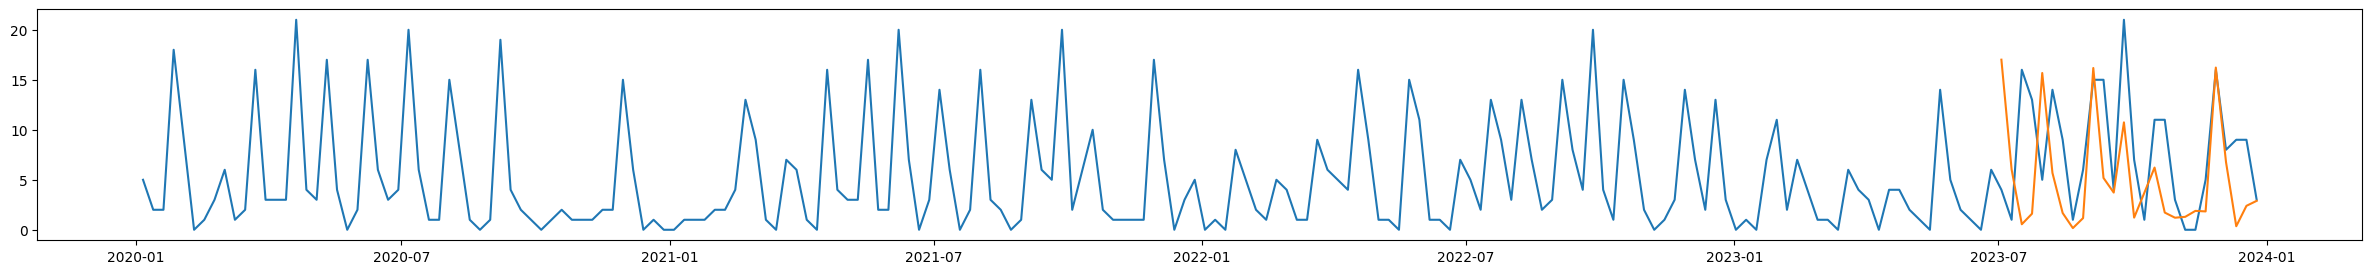

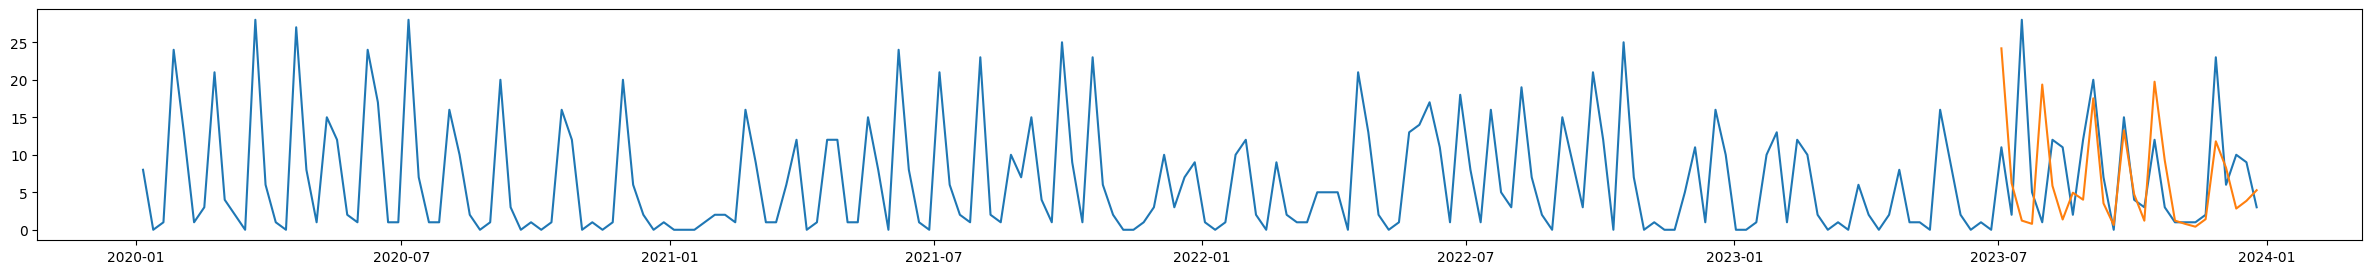

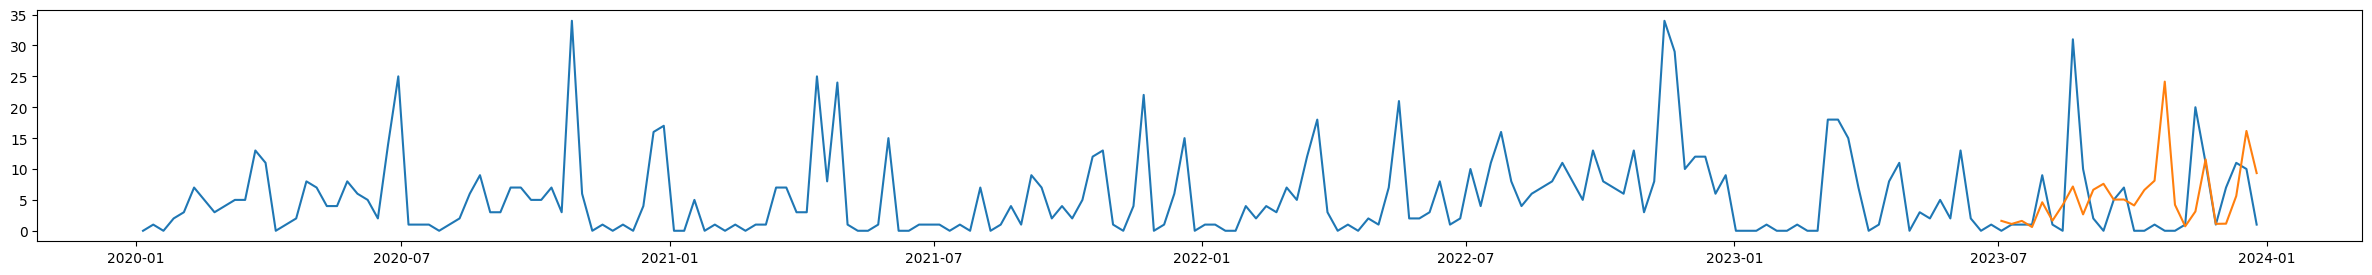

In [186]:
for lane in high_lanes:



  plt.figure(figsize=(30,3))

  plt.plot(df2[df2['Lane']==lane]['shipment'])

  lane_d=result_df[result_df['Lane']==lane]
  #plt.plot(lane_d['shipment'])
  plt.plot(lane_d['seasonal_plus_trend'])


  plt.show()

In [105]:
''''''#### GRID SEARCH FOR 4,5,6,7 LANE''' # and other 3 also will run in future
break

import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from itertools import product
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt


####################################################################

# PARAMETERS
p = [0,1,2]  # Autoregressive order
d = [0,1]  # Differencing order
q = [0,1,2]  # Moving average order
P = [0,1,2]  # Seasonal autoregressive order
D = [0,1]  # Seasonal differencing order
Q = [0,1,2]  # Seasonal moving average order
s = [52,13]  # Seasonal period (assuming monthly data)


param_grid = product(p, d, q, P, D, Q, s)

'''(208) data points'''

time_s = time.time()

# Perform grid search
for lane in ['DE08_29144781']:
    print(f"LANE IS {lane}")

    best_rmse = np.inf
    best_mape = np.inf
    best_params = None
    errors=[]

    ################################## predictions for another year
    k=52
    ################################## TRAIN SIZE =160
    train_size= 160 # (df2.Lane.value_counts()[0])*(160/208)

    i=0 # used for tracking the TIMES that the error decreases

    for param in param_grid:

        ##################### limiting the increments and error threshold #########################
        #if best_mape< 35 or best_rmse<3: # or i==10
        #   break

        print(f"Testing SARIMAX --{param}--")

        data=df2[df2['Lane']==lane][['shipment']]
        print(len(data) , 'is data length')

        #train_size = 150  # Adjust as needed
        forecast_steps = len(data)-train_size  # Adjust as needed
        print(f"forecast steps are {forecast_steps}")

        # Split the data into train and test sets
        train_data = data.iloc[:train_size]
        val_data=data.iloc[train_size:]


        to_model_data, err,trnd = remove_noise_and_get_smooth(train_data['shipment'])
        print(f"trend is {trnd}")


        # Fit SARIMAX model with parameters
        model = SARIMAX(to_model_data, order=param[:3], seasonal_order=(param[3], param[4], param[5], param[6]))
        try:
            print("model fitting----------")
            results = model.fit()
        except:
            print(f"Error occurred for parameters: SARIMAX{param}")
            continue

        # Make predictions for the future
        print("forecasting")
        forecast = results.forecast(steps=forecast_steps + k)
        print('forecast done')

        ### ERROR CALCULATION #################################################################

        val_data['pred_shipment']=pd.DataFrame(forecast)[:-k]['predicted_mean'].tolist()


        ########## mape error calculation ###############################################
        epsilon = 1e-8

        val_data['pred_shipment']=val_data['pred_shipment'].apply(lambda x : x+trnd)
        val_data['abs_error'] = np.abs(val_data['shipment'] - val_data['pred_shipment'])
        val_data['abs_error_rounded'] = round(val_data['abs_error'], 2)
        #print(val_data)


        # Calculate percentage error, handling division by zero
        #val_data['percent_error'] = (val_data['abs_error_rounded'] / (val_data['shipment'] + epsilon)) * 100

        # Calculate weighted MAPE
        #weighted_errors = val_data['percent_error'] * val_data['shipment']
        weighted_mape = val_data['abs_error'].sum() / val_data['shipment'].sum()
        #weighted_mape = round(np.sum(weighted_errors) / np.sum(val_data['shipment']), 2)

        # Calculate RMSE ########################################################
        wt_rmse = np.sqrt(((val_data['abs_error'])**2)*(val_data['shipment'])).sum() / (val_data['shipment'].sum())

        # Print weighted MAPE and RMSE
        print(f"Weighted MAPE: {weighted_mape}% ++++++++++++++++++")
        print(f"weight RMSE: {wt_rmse}++++++++++++++++++")

        #### PARAM LOGGING #######################################################
        errors.append((weighted_mape,wt_rmse))

        # Update best parameters if the current model has lower RMSE
        if wt_rmse < best_rmse*1.1:


            if (wt_rmse < best_rmse )and (weighted_mape< best_mape):
                print(f"RMSE Error lowered for given lane = {lane}, from {best_rmse, best_mape} --> rmse,mape : {wt_rmse , weighted_mape}")
                print(f"Decrease happened {i}-th time")

                i=i+1
                best_rmse = wt_rmse
                best_mape= weighted_mape
                best_params = param

                ################ PLOT IF ERROR IS LESS ################################################

                plt.figure(figsize=(21,3))
                plt.plot(data.index, data['shipment'], label='Original')

                plt.show()
                plt.plot(forecast.index , forecast, color='red', label='Forecast')


                for pp in range(26, len(data), 26):
                    plt.axvline(data.index[pp], color='gray', linestyle='--')


                plt.xlabel('Date')
                plt.ylabel('Shipment')
                plt.title('Original and Forecasted Time Series Data')
                plt.legend()
                plt.show()
                print("Time elapsed is ",time.time()-time_s)

    print(f"THE BEST FIT MODEL for lane {lane} WITH LOWEST ERROR {best_rmse, best_mape} IS PLOTTED ABOVE")

'''

SyntaxError: incomplete input (<ipython-input-105-e09e122a1bbf>, line 152)